In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('IRIS_ Flower_Dataset.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

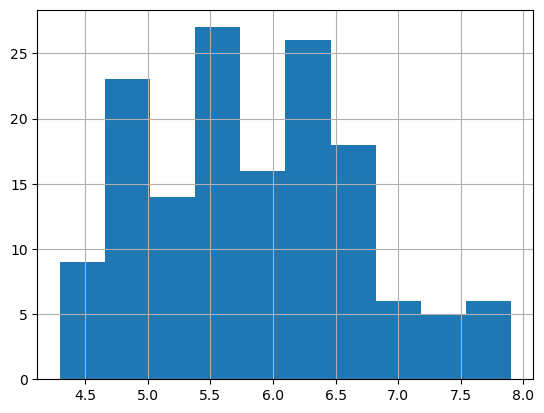

In [7]:
df['sepal_length'].hist()

<Axes: >

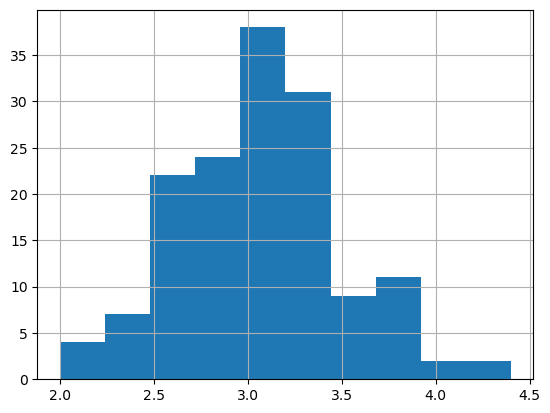

In [8]:
df['sepal_width'].hist()

<Axes: >

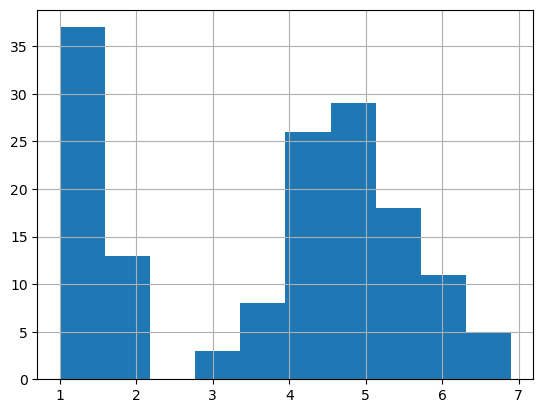

In [9]:
df['petal_length'].hist()

<Axes: >

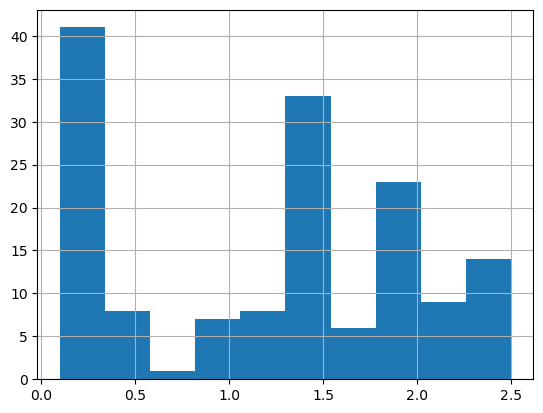

In [10]:
df['petal_width'].hist()

In [11]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

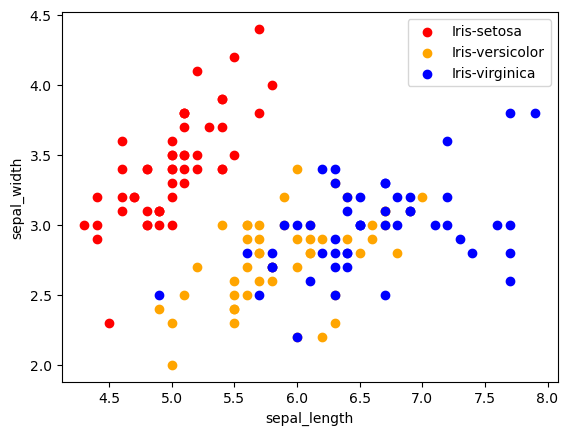

In [12]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.legend()

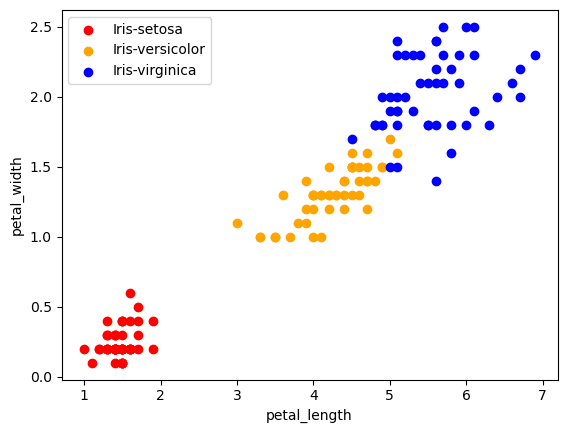

In [13]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    plt.legend()

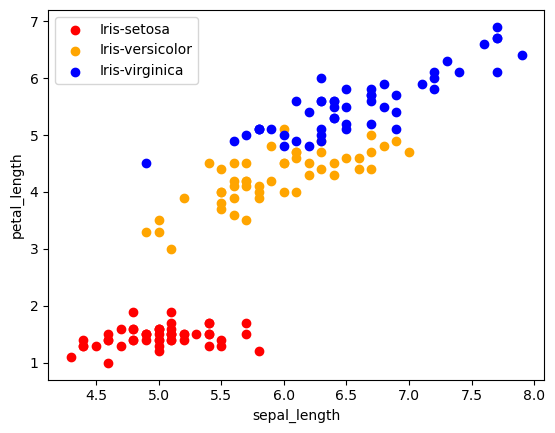

In [14]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
    plt.xlabel("sepal_length")
    plt.ylabel("petal_length")
    plt.legend()

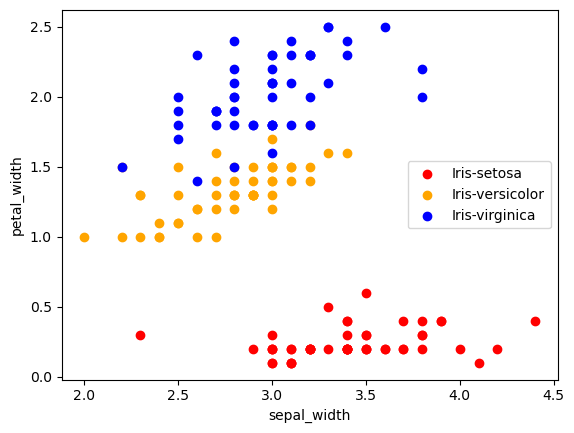

In [15]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel("sepal_width")
    plt.ylabel("petal_width")
    plt.legend()

In [16]:
df.corr()

C:\Users\doens\AppData\Local\Temp\ipykernel_27628\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

C:\Users\doens\AppData\Local\Temp\ipykernel_27628\2332126786.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

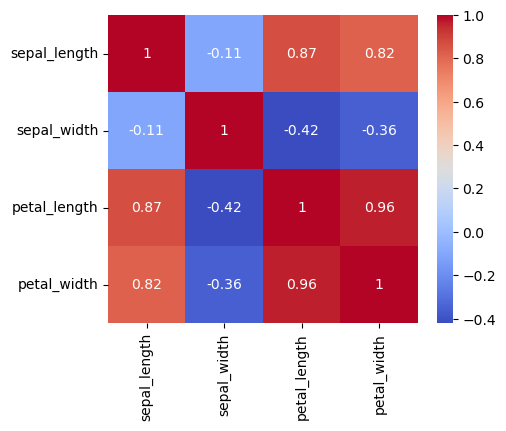

In [17]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
df['species']=le.fit_transform(df['species'])
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [54]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [62]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=110, random_state=42)

In [63]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=110, random_state=42)

In [64]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


Accuracy: 95.55555555555556


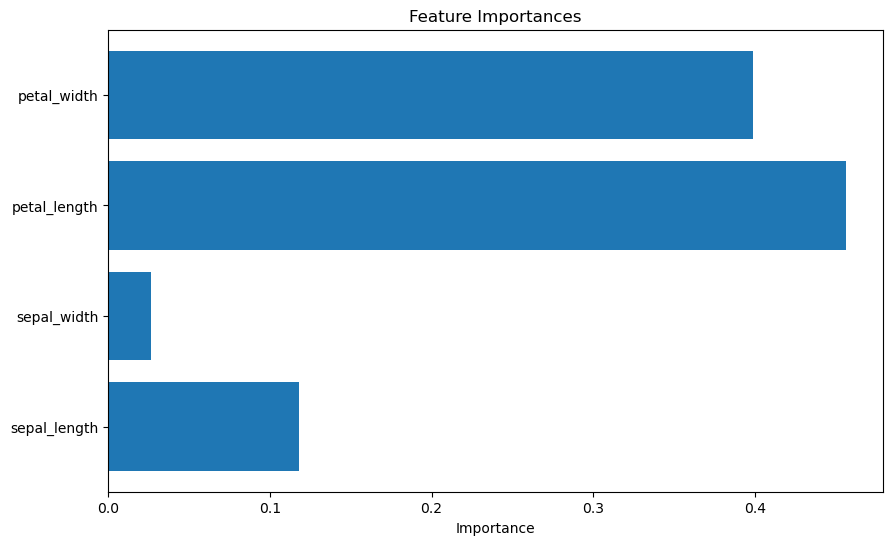

In [65]:
y_pred = model.predict(x_test)

# Print accuracy
accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy * 100)

# Plot Training and Validation Curves
# Note: RandomForestClassifier doesn't provide built-in history, so we won't have validation curves.
# We can, however, visualize feature importances.

# Feature Importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()

In [66]:
from sklearn.svm import SVC
model=SVC(kernel='linear', C=1.1, random_state=42)

In [67]:
model.fit(x_train,y_train)

SVC(C=1.1, kernel='linear', random_state=42)

In [68]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


C:\Users\doens\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: cannot reshape array of size 7500 into shape (50,50)

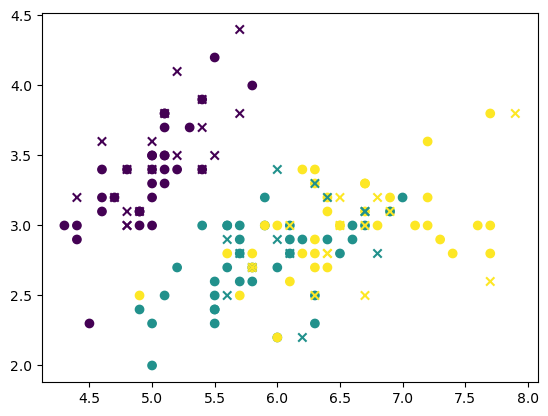

In [76]:
# Tracer la frontière de décision
plt.scatter(x_train['sepal_length'], x_train['sepal_width'], c=y_train, cmap='viridis', label='Train')
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_test, cmap='viridis', marker='x', label='Test')

# Tracer la frontière de décision du SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Créer une grille pour évaluer le modèle
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Prédire la classe pour chaque point de la grille
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer la frontière de décision et les marges du SVM
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Marquer les vecteurs de support
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.title('SVM Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()